In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [182]:
test.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [183]:
train.shape

(10500, 5)

It seems there is lot of information hidden in the ProductList variable. We need to extract as much information as possible. Here are the new features I can think which we can come up from this data :
    - Time spent in a session
    - category, sub-category, sub-sub category and the product
    - number of products browsed per session
    - number of categories browsed per session

In [184]:
train.nunique()

session_id     10500
startTime       8815
endTime         8803
ProductList     9402
gender             2
dtype: int64

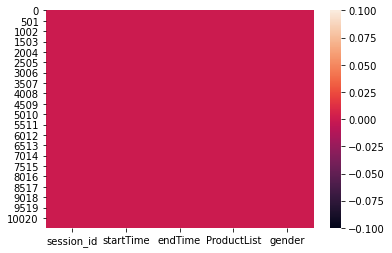

In [185]:
sns.heatmap(train.isnull())
plt.show()

Awesome! No missing data :)

In [186]:
df=train.append(test,ignore_index=True)
df['n_product']  = df['ProductList'].apply(lambda s : s.count(';')+1)

In [187]:
df['n_product'].unique()

array([ 4,  7,  1,  3,  2,  6, 14,  5,  9, 11, 10, 27, 19,  8, 13, 15, 12,
       24, 29, 17, 25, 16, 36, 18, 20, 30, 21, 22, 35, 43, 23, 31, 28])

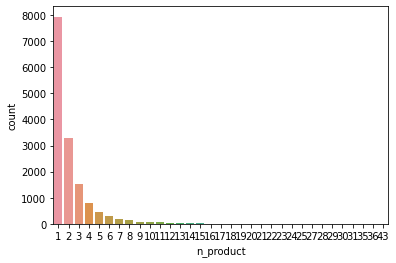

In [188]:
sns.countplot(df['n_product'])

In [189]:
new = df['ProductList'].str.split(";",expand = True)
new.fillna(value=0, inplace=True)

In [190]:
new.head(15)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,A00001/B00009/C00031/D25444/,A00001/B00009/C00031/D29418/,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A00002/B00001/C00020/D16944/,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,A00002/B00002/C00081/D25039/,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,A00002/B00011/C00180/D18487/,A00002/B00011/C00114/D18459/,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,A00002/B00001/C00059/D15254/,A00002/B00001/C00059/D00900/,A00002/B00002/C00002/D02063/,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,A00002/B00001/C00010/D06129/,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,A00002/B00001/C00010/D12841/,A00002/B00002/C00112/D20047/,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
new1 = new[0].str.split("/",expand=True)

In [192]:
new1.drop(labels = 4, axis = 1, inplace = True)

In [193]:
new1= new1.rename(columns={0: "cat", 1:"scat",2:"sscat", 3:"prod"})

In [194]:
df1 = pd.concat([df,new1],axis=1)

In [195]:
df1

,session_id,startTime,endTime,ProductList,gender,n_product,cat,scat,sscat,prod
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,A00002,B00003,C00006,D28435
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,A00001,B00009,C00031,D29404
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,1,A00002,B00001,C00020,D16944
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,A00002,B00004,C00018,D10284
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,A00001,B00001,C00012,D30805
...,...,...,...,...,...,...,...,...,...,...
14995,u23966,15/12/14 21:11,15/12/14 21:12,A00001/B00031/C00044/D03435/;A00001/B00031/C00...,NaN,3,A00001,B00031,C00044,D03435
14996,u20527,02/12/14 7:53,02/12/14 7:54,A00002/B00002/C00004/D17474/;A00002/B00002/C00...,NaN,2,A00002,B00002,C00004,D17474
14997,u13253,15/11/14 21:38,15/11/14 21:46,A00002/B00007/C00098/D03350/;A00002/B00007/C00...,NaN,9,A00002,B00007,C00098,D03350
14998,u17094,17/12/14 8:51,17/12/14 8:51,A00001/B00031/C00044/D09604/,NaN,1,A00001,B00031,C00044,D09604


In [196]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   session_id   15000 non-null  object
 1   startTime    15000 non-null  object
 2   endTime      15000 non-null  object
 3   ProductList  15000 non-null  object
 4   gender       10500 non-null  object
 5   n_product    15000 non-null  int64 
 6   cat          15000 non-null  object
 7   scat         15000 non-null  object
 8   sscat        15000 non-null  object
 9   prod         15000 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [197]:
dateparser = lambda x : pd.datetime.strptime(x,"%d/%m/%y %H:%M")
df1['startTime'] = df1['startTime'].apply(dateparser)
df1['endTime'] = df1['endTime'].apply(dateparser)

/home/jeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [198]:
df1['time difference'] = (pd.to_datetime(df1['endTime']) - pd.to_datetime(df1['startTime'])).dt.total_seconds()/60

In [199]:
df1.head(10)

,session_id,startTime,endTime,ProductList,gender,n_product,cat,scat,sscat,prod,time difference
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,A00002,B00003,C00006,D28435,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,A00001,B00009,C00031,D29404,6.0
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,1,A00002,B00001,C00020,D16944,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,A00002,B00004,C00018,D10284,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,A00001,B00001,C00012,D30805,2.0
5,u20964,2014-12-12 15:31:00,2014-12-12 15:31:00,A00002/B00002/C00081/D25039/,female,1,A00002,B00002,C00081,D25039,0.0
6,u20981,2014-12-05 19:33:00,2014-12-05 19:34:00,A00002/B00011/C00180/D18487/;A00002/B00011/C00...,female,2,A00002,B00011,C00180,D18487,1.0
7,u15947,2014-12-09 16:02:00,2014-12-09 16:06:00,A00002/B00001/C00059/D15254/;A00002/B00001/C00...,male,3,A00002,B00001,C00059,D15254,4.0
8,u18193,2014-11-25 11:55:00,2014-11-25 11:55:00,A00002/B00001/C00010/D06129/,male,1,A00002,B00001,C00010,D06129,0.0
9,u21820,2014-12-06 16:16:00,2014-12-06 16:17:00,A00002/B00001/C00010/D12841/;A00002/B00002/C00...,female,2,A00002,B00001,C00010,D12841,1.0


In [200]:
df1.drop(columns=['endTime','startTime','ProductList'],inplace=True)

In [201]:
df1.head()


,session_id,gender,n_product,cat,scat,sscat,prod,time difference
0,u16159,female,4,A00002,B00003,C00006,D28435,1.0
1,u10253,male,7,A00001,B00009,C00031,D29404,6.0
2,u19037,female,1,A00002,B00001,C00020,D16944,0.0
3,u14556,female,3,A00002,B00004,C00018,D10284,3.0
4,u24295,male,2,A00001,B00001,C00012,D30805,2.0


In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for a in ['cat','scat','sscat','prod'] :
    df1[a] = le.fit_transform(df1[a])
df1.head()

,session_id,gender,n_product,cat,scat,sscat,prod,time difference
0,u16159,female,4,1,2,5,9144,1.0
1,u10253,male,7,0,8,30,9422,6.0
2,u19037,female,1,1,0,19,5795,0.0
3,u14556,female,3,1,3,17,3668,3.0
4,u24295,male,2,0,0,11,9762,2.0


In [203]:
df_train=df1[df1['gender'].isnull()==False].copy()
df_test=df1[df1['gender'].isnull()==True].copy()

print(df_train.shape,df_test.shape)

(10500, 8) (4500, 8)


In [204]:
test_ids = df_test['session_id'] 

In [205]:
df_train.head()

,session_id,gender,n_product,cat,scat,sscat,prod,time difference
0,u16159,female,4,1,2,5,9144,1.0
1,u10253,male,7,0,8,30,9422,6.0
2,u19037,female,1,1,0,19,5795,0.0
3,u14556,female,3,1,3,17,3668,3.0
4,u24295,male,2,0,0,11,9762,2.0


In [206]:
df_train['gender']=df_train['gender'].apply(lambda x : 1 if x == 'male' else 0)
df_train.drop(columns='session_id',axis=1, inplace=True)
df_test.drop(columns=['gender','session_id'],axis=1, inplace=True)

In [207]:
df_train.head()

,gender,n_product,cat,scat,sscat,prod,time difference
0,0,4,1,2,5,9144,1.0
1,1,7,0,8,30,9422,6.0
2,0,1,1,0,19,5795,0.0
3,0,3,1,3,17,3668,3.0
4,1,2,0,0,11,9762,2.0


In [208]:
df_test.head()

,n_product,cat,scat,sscat,prod,time difference
10500,1,1,2,5,6768,0.0
10501,1,1,4,65,809,0.0
10502,1,1,1,3,4408,0.0
10503,4,1,2,76,7585,3.0
10504,1,1,0,9,7756,0.0


In [209]:
x = df_train.drop('gender',axis=1)
y = df_train['gender']

In [210]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

Modeling

In [211]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score

def disp_confusion_matrix(model, x, y):
    ypred = model.predict(x)
    cm = confusion_matrix(y,ypred)
    ax = sns.heatmap(cm,annot=True,fmt='d')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print('Accuracy =',accuracy)
    print('Precision =',precision)
    print('Recall =',recall)
    print('F1 Score =',f1)

def disp_roc_curve(model, xtest, ytest):
    yprob = model.predict_proba(xtest)
    fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
    roc_auc = roc_auc_score(ytest,yprob[:,1])

    print('ROC AUC =', roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
print('Training set score = {:.3f}'.format(rf.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(rf.score(xtest,ytest)))

Training set score = 0.994
Test set score = 0.862


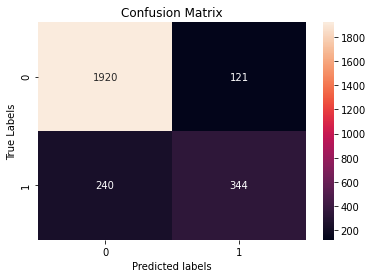

Accuracy = 0.8624761904761905
Precision = 0.7397849462365591
Recall = 0.589041095890411
F1 Score = 0.655862726406101
ROC AUC = 0.8378208204412286


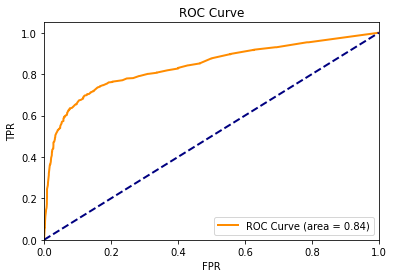

In [213]:

disp_confusion_matrix(rf, xtest, ytest)
disp_roc_curve(rf, xtest, ytest)

In [244]:

rf.fit(x,y)
test_prob = rf.predict_proba(df_test)[:,1]
df_rf = pd.DataFrame({'session_id':test_ids,'gender':test_prob})


In [220]:
df_rf['gender'] = df_rf['gender'].apply(lambda x : 'male' if x>0.5 else 'female')

In [221]:
df_rf['gender'].value_counts()


female    3695
male       805
Name: gender, dtype: int64

In [222]:
df_rf.to_csv('submission-rf.csv',index=False)

In [223]:
pd.DataFrame({'Features':x.columns, 'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)

,Features,Importance
4,prod,0.397114
1,cat,0.300418
3,sscat,0.135030
2,scat,0.070968
5,time difference,0.053060
0,n_product,0.043409


Gradient Boosting

In [224]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(xtrain,ytrain)
print('Training set score = {:.3f}'.format(xgb.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(xgb.score(xtest,ytest)))

Training set score = 0.918
Test set score = 0.872


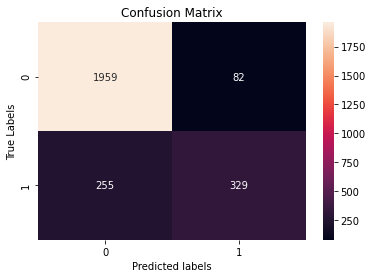

Accuracy = 0.8716190476190476
Precision = 0.8004866180048662
Recall = 0.5633561643835616
F1 Score = 0.6613065326633165
ROC AUC = 0.8399186538964918


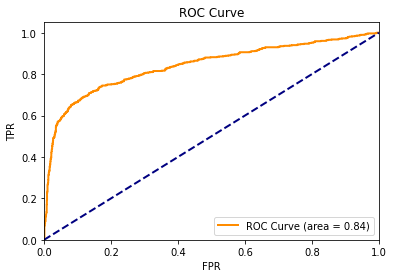

In [225]:

disp_confusion_matrix(xgb, xtest, ytest)
disp_roc_curve(xgb, xtest, ytest)

In [231]:


xgb.fit(x,y)
test_prob = xgb.predict_proba(df_test)[:,1]
df_xgb = pd.DataFrame({'session_id':test_ids,'gender':test_prob})
df_xgb.head()

,session_id,gender
10500,u12112,0.084632
10501,u19725,0.138044
10502,u11795,0.187565
10503,u22639,0.453490
10504,u18034,0.140104


In [232]:
df_xgb['gender'] = df_xgb['gender'].apply(lambda x : 'male' if x>0.5 else 'female')



In [234]:
df_xgb['gender'].value_counts()

female    3814
male       686
Name: gender, dtype: int64

In [235]:
df_xgb.to_csv('submission-xgb.csv',index=False)

100 : [0.84164065 0.8314981  0.82638459 0.82802977 0.83983345]
150 : [0.8424129  0.83192955 0.82340279 0.82427361 0.83664087]
200 : [0.83873427 0.82856194 0.82267732 0.82279097 0.83745157]
250 : [0.83780386 0.82703265 0.81608471 0.8204157  0.8367968 ]


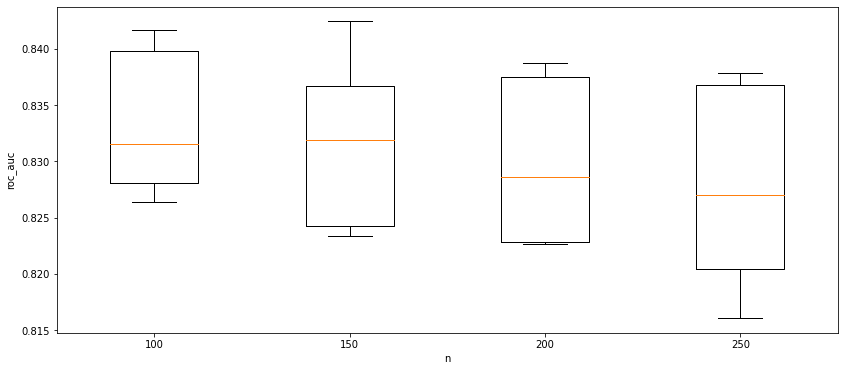

In [236]:
arr=[100,150,200,250]
cv_scores = []
for a in arr:
    model = XGBClassifier(objective='binary:logistic', n_jobs=4, n_estimators=a)
    cv_score = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
    print(a, ':', cv_score)
    cv_scores.append(cv_score)
    
fig, ax = plt.subplots(figsize=(14,6))
plt.boxplot(cv_scores)
ax.set_xticklabels(arr)
plt.xlabel('n')
plt.ylabel('roc_auc')
plt.show()

In [239]:
param_grid = {
    'max_depth':[5,6],
    'subsample':[0.8,0.9,1],
    'colsample_bytree': [0.6,0.8,1],
    'min_child_weight': [0.5,1],
    'gamma': [0,0.5,1]
}
xgb = XGBClassifier(objective='binary:logistic', n_jobs=4, n_estimators=150)
xgb_grid = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=4)
xgb_grid.fit(x, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 44.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 108.1min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed: 137.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

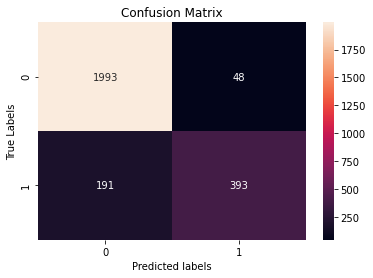

Accuracy = 0.908952380952381
Precision = 0.891156462585034
Recall = 0.672945205479452
F1 Score = 0.766829268292683
ROC AUC = 0.9478662588175284


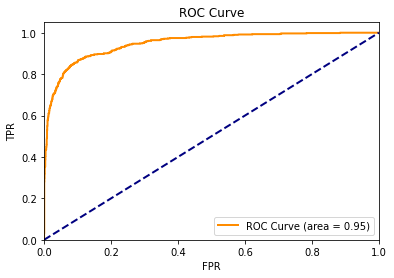

In [240]:

xgb_best = xgb_grid.best_estimator_
disp_confusion_matrix(xgb_best, xtest, ytest)
disp_roc_curve(xgb_best, xtest, ytest)

In [245]:

xgb_best.fit(x,y)
test_prob = xgb_best.predict_proba(df_test)[:,1]
df_xgbgs = pd.DataFrame({'session_id':test_ids,'gender':test_prob})
df_xgbgs.head()

,session_id,gender
10500,u12112,0.081252
10501,u19725,0.278719
10502,u11795,0.131750
10503,u22639,0.535807
10504,u18034,0.245540


In [242]:
df_xgbgs['gender'] = df_xgbgs['gender'].apply(lambda x : 'male' if x>0.5 else 'female')
df_xgbgs.to_csv('submission-xgbgs.csv',index=False)

In [249]:
df_rfxgb=df_rf
df_rfxgb['gender']=(df_rf['gender']+df_xgbgs['gender'])/2

In [250]:
df_rfxgb['gender'] = df_rfxgb['gender'].apply(lambda x : 'male' if x>0.5 else 'female')
df_rfxgb.to_csv('submission-rfxgb.csv',index=False)

LGB

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(xtrain,ytrain)
print('Training set score = {:.3f}'.format(lgb.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(lgb.score(xtest,ytest)))

In [ ]:
disp_confusion_matrix(lgb, xtest, ytest)
disp_roc_curve(lgb, xtest, ytest)

In [ ]:
arr=[-1,10,20,30,50]
cv_scores = []
for a in arr:
    model = LGBMClassifier(objective='binary', n_jobs=4, boosting_type='gbdt', n_estimators=100, max_depth=a)
    cv_score = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
    print(a, ':', cv_score)
    cv_scores.append(cv_score)
    
fig, ax = plt.subplots(figsize=(14,6))
plt.boxplot(cv_scores)
ax.set_xticklabels(arr)
plt.xlabel('n')
plt.ylabel('roc_auc')
plt.show()

In [ ]:
param_grid = {
    'num_leaves':[40,60],
    'max_depth':[-1,10],
    'subsample':[0.8,0.9,1],
    'colsample_bytree': [0.6,0.8,1],
    'min_child_samples': [20,10,30],
    'min_split_gain':[0,0.5,1]
}
lgb = LGBMClassifier(objective='binary', n_jobs=4, boosting_type='gbdt', learning_rate=0.01, n_estimators=100, silent=False)
lgb_grid = GridSearchCV(lgb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=4)
lgb_grid.fit(x, y)

In [ ]:
lgb_best = lgb_grid.best_estimator_
disp_confusion_matrix(lgb_best, xtest, ytest)
disp_roc_curve(lgb_best, xtest, ytest)